# <center> Import Libraries </center> 

In [244]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell

# <center> Reading Dataset </center>

In [245]:
sales_data = pd.read_csv('all_data.csv') 
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [246]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [247]:
sales_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [248]:
sales_data.shape

(186850, 6)

In [249]:
# check a missing/null value
sales_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [250]:
sales_data = sales_data.rename(mapper=str.strip, axis='columns') #strip in case there is one or more space remove
sales_data = sales_data.rename(columns={'Quantity Ordered': 'Qty','Price Each':'Price'})

sales_data.head()

,Order ID,Product,Qty,Price,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [251]:
sales_data.tail()

,Order ID,Product,Qty,Price,Order Date,Purchase Address
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
186849,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"


In [252]:
sales_data.columns

Index(['Order ID', 'Product', 'Qty', 'Price', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [253]:
col_name = list(sales_data.columns)
col_name = [x.lower().strip() for x in col_name] 
sales_data.columns = col_name
sales_data.head()

,order id,product,qty,price,order date,purchase address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


# <center> Data Cleaning </center> 

In [254]:
sales_data.isnull().sum()

order id            545
product             545
qty                 545
price               545
order date          545
purchase address    545
dtype: int64

In [255]:
sales_data.duplicated().sum()

1162

In [256]:
sales_data = sales_data.dropna(how='all')
sales_data.isnull().sum()

order id            0
product             0
qty                 0
price               0
order date          0
purchase address    0
dtype: int64

In [257]:
sales_data.duplicated().sum()

618

In [258]:
sales_data[sales_data.duplicated()==True]

,order id,product,qty,price,order date,purchase address
243,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
628,237276,Lightning Charging Cable,1,14.95,08/22/19 10:43,"446 2nd St, Boston, MA 02215"
925,237560,USB-C Charging Cable,1,11.95,08/09/19 00:26,"397 Lincoln St, San Francisco, CA 94016"
1291,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1412,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185070,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185085,317971,AA Batteries (4-pack),1,3.84,12/17/19 18:39,"250 Chestnut St, San Francisco, CA 94016"
185481,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185925,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [259]:
#drop the duplicated rows
clean = sales_data[~ sales_data.duplicated()]
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order id          185687 non-null  object
 1   product           185687 non-null  object
 2   qty               185687 non-null  object
 3   price             185687 non-null  object
 4   order date        185687 non-null  object
 5   purchase address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [260]:
clean.head()

,order id,product,qty,price,order date,purchase address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [261]:
#check if there is non-numeric values
clean['qty'].unique()

array(['2', '1', '3', '4', 'Quantity Ordered', '6', '7', '5', '8', '9'],
      dtype=object)

In [262]:
#find out where are non-numeric values
non_n = clean[clean['qty'] == 'Quantity Ordered']
non_n.head()

,order id,product,qty,price,order date,purchase address
211,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [263]:
#drop it
clean = clean.drop(index=211)

In [264]:
#after drop see dataset it's drop or not
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order id          185686 non-null  object
 1   product           185686 non-null  object
 2   qty               185686 non-null  object
 3   price             185686 non-null  object
 4   order date        185686 non-null  object
 5   purchase address  185686 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


# <center> Data Preprocessing </center> 

In [265]:
clean.dtypes

order id            object
product             object
qty                 object
price               object
order date          object
purchase address    object
dtype: object

## Add Month, Hour, Minute,Total Sales, Cities Column

In [266]:
clean['qty'].head()

0    2
1    1
2    1
3    2
4    2
Name: qty, dtype: object

In [267]:
#typecasting 
clean['qty'] = clean['qty'].astype(int)
clean['price'] = clean['price'].astype(float)
clean['purchase address'] = clean['purchase address'].astype(str)

In [268]:
#add a column "year"
clean['order date'] = pd.to_datetime(clean['order date'])
clean['year'] = clean['order date'].dt.year

In [269]:
#extract Months from Order Date 
clean['order date'] = pd.to_datetime(clean['order date'], format='%m/%d/%y %H:%M')
clean['month'] = pd.DatetimeIndex(clean['order date']).month

In [270]:
# add a column "hour"
clean['hour'] = clean['order date'].dt.hour

In [271]:
# add a column "minute"
clean['minute'] = clean['order date'].dt.minute

In [272]:
#add a column "total sales" 
clean['total sales'] = clean['qty']* clean['price']

In [273]:
#extract State from Purchase Address
def city(x):
    return x.split(',')[1]

clean['cities'] = clean['purchase address'].apply(city)

In [274]:
clean['Type'] = ''
clean['Type'] = np.where(clean['product'].str.contains("Cable"), "Cable", clean['Type'])
clean['Type'] = np.where(clean['product'].str.contains("Batteries"), "Batteries", clean['Type'])
clean['Type'] = np.where(clean['product'].str.contains("Phone"), "Phone", clean['Type'])
clean['Type'] = np.where(clean['product'].str.contains("phones"), "Headphones", clean['Type'])
clean['Type'] = np.where(clean['product'].str.contains("Monitor"), "Monitor/TV/Laptop", clean['Type'])
clean['Type'] = np.where(clean['product'].str.contains("TV"), "Monitor/TV/Laptop", clean['Type'])
clean['Type'] = np.where(clean['product'].str.contains("Laptop"), "Monitor/TV/Laptop", clean['Type'])

In [275]:
clean.head()

,order id,product,qty,price,order date,purchase address,year,month,hour,minute,total sales,cities,Type
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",2019,8,22,21,23.98,Seattle,Headphones
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",2019,8,15,11,99.99,Dallas,Headphones
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",2019,8,14,40,700.00,Portland,Phone
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",2019,8,20,59,7.68,Los Angeles,Batteries
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",2019,8,19,53,7.68,New York City,Batteries


In [276]:
clean

,order id,product,qty,price,order date,purchase address,year,month,hour,minute,total sales,cities,Type
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",2019,8,22,21,23.98,Seattle,Headphones
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",2019,8,15,11,99.99,Dallas,Headphones
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",2019,8,14,40,700.00,Portland,Phone
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",2019,8,20,59,7.68,Los Angeles,Batteries
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",2019,8,19,53,7.68,New York City,Batteries
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",2019,12,20,58,14.95,San Francisco,Cable
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",2019,12,12,1,7.68,Los Angeles,Batteries
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",2019,12,6,43,400.00,Seattle,Phone
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",2019,12,10,39,11.99,Dallas,Headphones


In [277]:
clean.shape

(185686, 13)

## <center>Ploting</center>

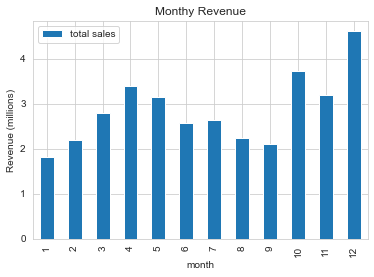

In [278]:
monthlysales['total sales'] = monthlysales['total sales']/1000000
df = pd.DataFrame(monthlysales)
df.plot(kind='bar', x= 'month', y= 'total sales')
plt.title("Monthy Revenue")
plt.ylabel('Revenue (millions)')
plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'qty'),
  Text(0, 1.5, 'price'),
  Text(0, 2.5, 'year'),
  Text(0, 3.5, 'month'),
  Text(0, 4.5, 'hour'),
  Text(0, 5.5, 'minute'),
  Text(0, 6.5, 'total sales')])

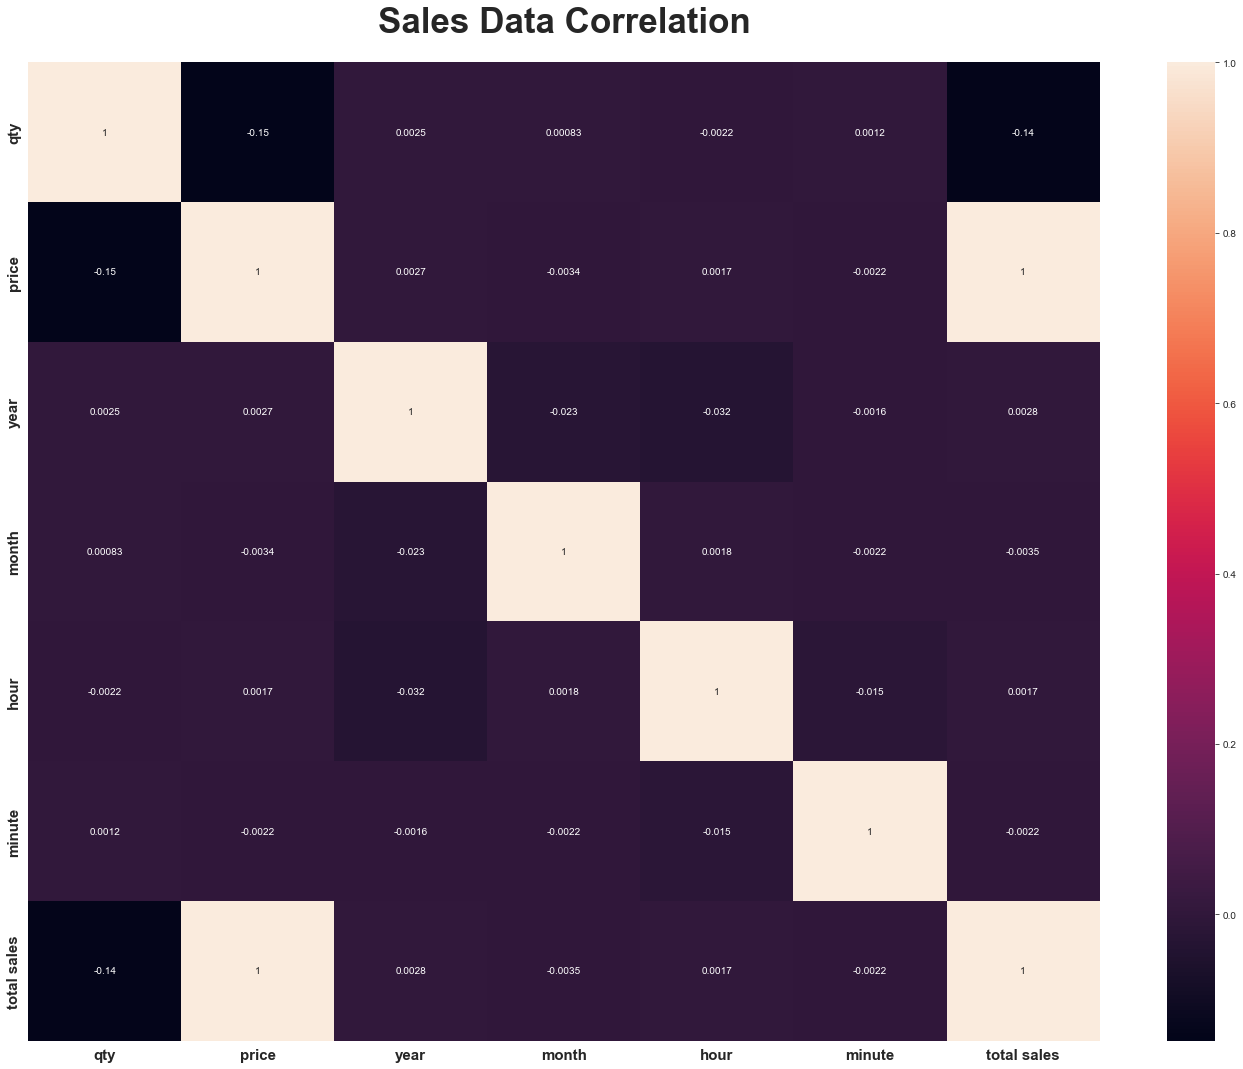

In [279]:
#heatmap
sns.set_style("whitegrid") 
plt.figure(figsize=(24, 18))
sns.heatmap(clean.corr(), annot=True)
plt.title("Sales Data Correlation", weight="bold", fontsize=35, pad=30)
plt.xticks(weight="bold", fontsize=15)
plt.yticks(weight="bold", fontsize=15)

In [280]:
dt1 = clean.groupby(['Type']).qty.sum().reset_index()
dt1

,Type,qty
0,,1312
1,Batteries,58601
2,Cable,47100
3,Headphones,49591
4,Monitor/TV/Laptop,37764
5,Phone,14444


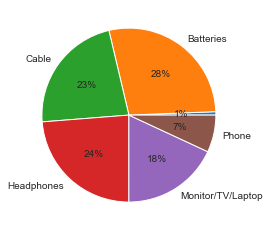

In [281]:
# pie chart
plt.pie(dt1['qty'], labels = dt1['Type'],autopct='%.0f%%')
plt.show()

In [282]:
dt2 = clean.groupby(['cities','Type'])['qty'].sum().reset_index()
dt2

,cities,Type,qty
0,Atlanta,,111
1,Atlanta,Batteries,4551
2,Atlanta,Cable,3786
3,Atlanta,Headphones,3924
4,Atlanta,Monitor/TV/Laptop,3044
5,Atlanta,Phone,1168
6,Austin,,81
7,Austin,Batteries,3090
8,Austin,Cable,2554
9,Austin,Headphones,2718


<AxesSubplot:xlabel='cities', ylabel='qty'>

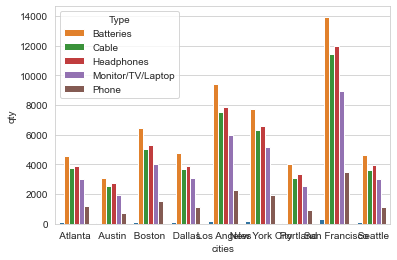

In [283]:
sns.barplot(data=dt2, x = "cities", y ="qty",hue='Type')

## <center> Data analysis </center>

### Total number of sales by months

In [287]:
#Find the total number of sales by months

monthly_sales = clean.groupby(['month'])['total sales'].sum().reset_index()

monthly_sales

,month,total sales
0,1,1821413.16
1,2,2200078.08
2,3,2804973.35
3,4,3389217.98
4,5,3150616.23
5,6,2576280.15
6,7,2646461.32
7,8,2241083.37
8,9,2094465.69
9,10,3734777.86


Text(0, 0.5, 'Sales in USD')

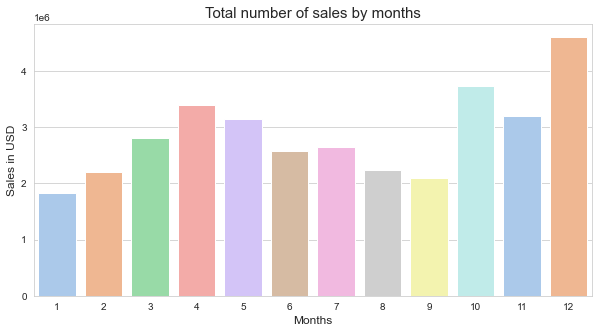

In [288]:
#Visualisation

plt.figure(figsize = (10,5))

sns.barplot( 
    data = monthly_sales,
    x = monthly_sales['month'], 
    y = monthly_sales['total sales'],
    palette = 'pastel'
    )

plt.title('Total number of sales by months',fontsize = 15)
plt.xlabel('Months',fontsize = 12)
plt.ylabel('Sales in USD',fontsize = 12)

### Trend in the monthly sales

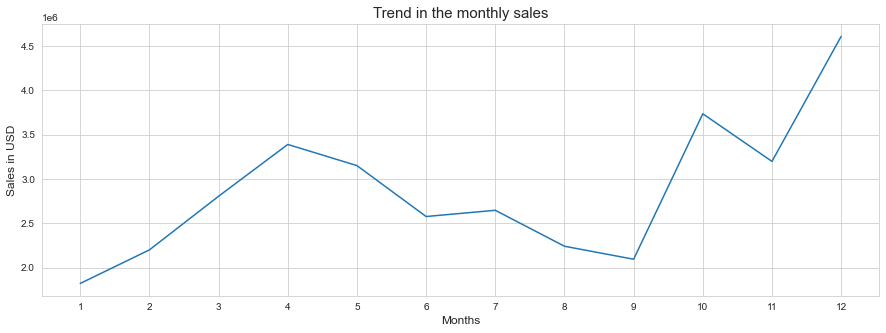

In [289]:
#Visualisation for trend in the monthly sales

plt.figure(figsize = (15,5))

sns.lineplot( 
    data = monthly_sales,
    x = monthly_sales['month'], 
    y = monthly_sales['total sales']
    )

plt.xticks(ticks = monthly_sales['month'])
plt.title('Trend in the monthly sales',fontsize = 15)
plt.xlabel('Months',fontsize = 12)
plt.ylabel('Sales in USD',fontsize = 12)
plt.grid(True)

### Trend in the hourly sales

In [290]:
#Find the total number of sales by hours

hourly_sales = clean.groupby('hour')['total sales'].sum().reset_index()

hourly_sales

,hour,total sales
0,0,713548.66
1,1,460563.90
2,2,234839.45
3,3,145742.94
4,4,162546.07
5,5,230664.87
6,6,447963.01
7,7,744067.32
8,8,1192309.20
9,9,1638784.04


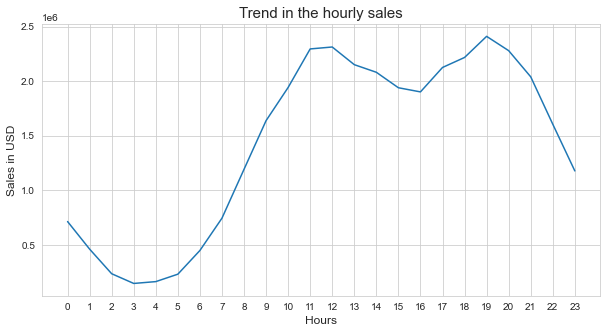

In [291]:
#Visualisation

plt.figure(figsize = (10,5))

sns.lineplot( 
    data = hourly_sales,
    x = hourly_sales['hour'], 
    y = hourly_sales['total sales']
    )

plt.xticks(ticks = hourly_sales['hour'])
plt.title('Trend in the hourly sales',fontsize = 15)
plt.xlabel('Hours',fontsize = 12)
plt.ylabel('Sales in USD',fontsize = 12)
plt.grid(True)

### Total number of sales by city

In [292]:
#Find the total sales by city

city_sales = clean.groupby('cities')['total sales'].sum().sort_values(ascending = False).reset_index()

city_sales

,cities,total sales
0,San Francisco,8254743.55
1,Los Angeles,5448304.28
2,New York City,4661867.14
3,Boston,3658627.65
4,Atlanta,2794199.07
5,Dallas,2765373.96
6,Seattle,2745046.02
7,Portland,2319331.94
8,Austin,1818044.33


Text(0, 0.5, 'City')

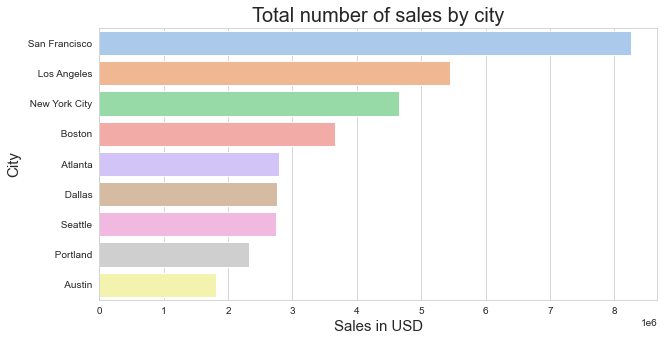

In [293]:
#Visualisation

plt.figure(figsize = (10,5))

sns.barplot( 
    data = city_sales,
    x = city_sales['total sales'], 
    y = city_sales['cities'], 
    palette = 'pastel'
    )

plt.title('Total number of sales by city',fontsize = 20)
plt.xlabel('Sales in USD',fontsize = 15)
plt.ylabel('City',fontsize = 15)

### Best Selling Products

In [294]:
#Find the Quantity ordered of each product

product_order = clean.groupby('product')['qty'].count().sort_values(ascending = False)[:10].reset_index()

product_order

,product,qty
0,USB-C Charging Cable,21859
1,Lightning Charging Cable,21610
2,AAA Batteries (4-pack),20612
3,AA Batteries (4-pack),20558
4,Wired Headphones,18849
5,Apple Airpods Headphones,15525
6,Bose SoundSport Headphones,13298
7,27in FHD Monitor,7498
8,iPhone,6840
9,27in 4K Gaming Monitor,6225


Text(0, 0.5, 'Products')

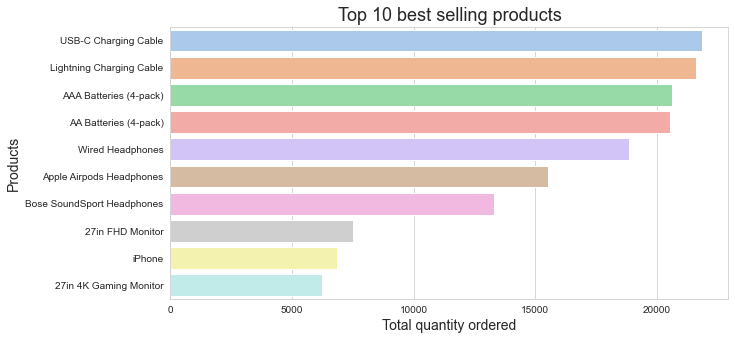

In [295]:
#Visualisation

plt.figure(figsize = (10,5))

sns.barplot( 
    data = product_order,
    x = product_order['qty'], 
    y = product_order['product'], 
    palette = 'pastel')

plt.title('Top 10 best selling products',fontsize = 18)
plt.xlabel('Total quantity ordered',fontsize = 14)
plt.ylabel('Products',fontsize = 14)

In [284]:
(clean.corr()['total sales'].sort_values(ascending=False).to_frame().T)

,total sales,price,year,hour,minute,month,qty
total sales,1.0,0.999202,0.00282,0.001683,-0.002245,-0.003454,-0.139564


In [285]:
sales_data_numeric = clean.describe(include=[np.number]) 
"Statistical Measure of Sales Data in Numeric Data"
sales_data_numeric

,qty,price,year,month,hour,minute,total sales
count,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000
mean,1.124544,184.519255,2019.000183,7.058653,14.412934,29.480537,185.611936
std,0.443069,332.843838,0.013530,3.502932,5.423329,17.317681,333.032118
min,1.000000,2.990000,2019.000000,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019.000000,4.000000,11.000000,14.000000,11.950000
50%,1.000000,14.950000,2019.000000,7.000000,15.000000,29.000000,14.950000
75%,1.000000,150.000000,2019.000000,10.000000,19.000000,45.000000,150.000000
max,9.000000,1700.000000,2020.000000,12.000000,23.000000,59.000000,3400.000000


In [286]:
# statistical measure of sales data without numeric type of data
sales_data_object = clean.describe(exclude=[np.number])
"Statistical Measure of Sales Data in Object / Str Data"
sales_data_object

,order id,product,order date,purchase address,cities,Type
count,185686,185686,185686,185686,185686,185686
unique,178437,19,142395,140787,9,6
top,160873,USB-C Charging Cable,2019-12-15 20:16:00,"193 Forest St, San Francisco, CA 94016",San Francisco,Headphones
freq,5,21859,8,9,44662,47672
first,NaN,NaN,2019-01-01 03:07:00,NaN,NaN,NaN
last,NaN,NaN,2020-01-01 05:13:00,NaN,NaN,NaN


#  <center> Univariate Analysis </center>

In [296]:
def univariate_analysis( data, color, title1, title2):
    fig, (ax1, ax2) = plt.subplots( ncols=2, nrows=1, figsize=(20, 6))
    # Distribution plot
    sns.distplot( data, ax=ax1, kde=True, color=color)
    ax1.set_title( title1, weight="bold", fontsize=25,  pad=30 ) 
    # QQ plot
    qqplot( data,  ax=ax2, line='s')   
    ax2.set_title( title2,  weight="bold",  fontsize=25, pad=30 )
    
    return fig # returning the figure

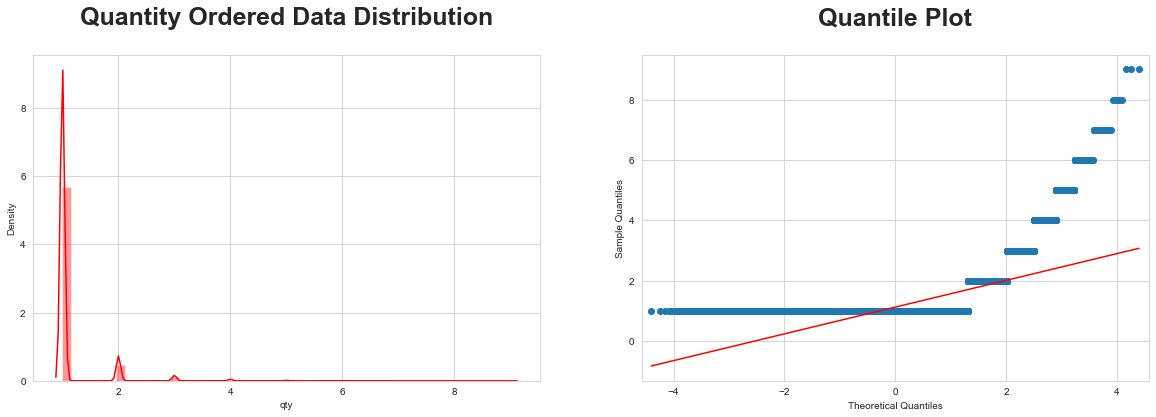

In [297]:
# Quantity Ordered Data
univariate_analysis(data=clean['qty'],color='red', title1='Quantity Ordered Data Distribution', title2='Quantile Plot');

## Price Each Data 

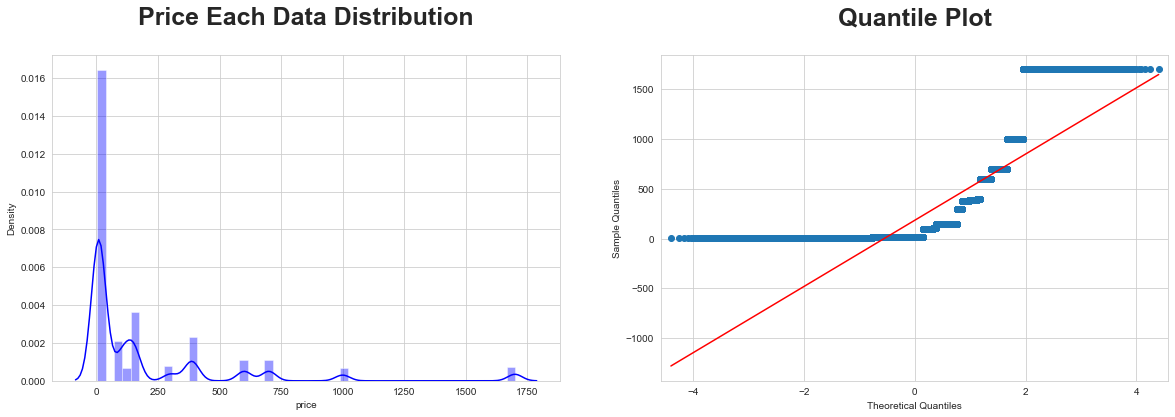

In [298]:
univariate_analysis(data=clean['price'], color='blue', title1='Price Each Data Distribution', title2='Quantile Plot' );

## Total Sales Data

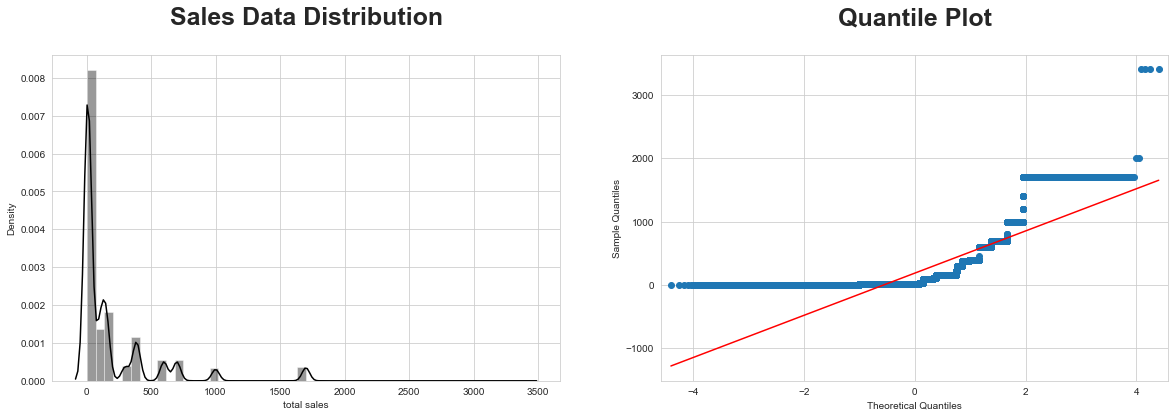

In [299]:
univariate_analysis( data=clean['total sales'], color='black', title1='Sales Data Distribution',title2='Quantile Plot' );

## Checking skewness value

In [300]:
skew_value = clean.skew().sort_values(ascending=False)
skew_value

year           73.881265
qty             4.829811
total sales     2.880376
price           2.870605
minute          0.002603
order id        0.000965
month          -0.088375
hour           -0.530178
dtype: float64

## Find Some Questions.

### What is the total number of sales in 2019?


In [301]:
clean.groupby('order id')['order id'].count()

order id
141234    1
141235    1
141236    1
141237    1
141238    1
         ..
319666    1
319667    1
319668    1
319669    1
319670    1
Name: order id, Length: 178437, dtype: int64

### What is the annual & monthly revenue in 2019?

In [302]:
#annual 
clean['total sales'].sum().round(2)

34465537.94

In [303]:
#monthly
clean.groupby('month')['total sales'].sum()

month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: total sales, dtype: float64

In [304]:
monthlysales= clean.groupby('month')['total sales'].sum().reset_index()
monthlysales

,month,total sales
0,1,1821413.16
1,2,2200078.08
2,3,2804973.35
3,4,3389217.98
4,5,3150616.23
5,6,2576280.15
6,7,2646461.32
7,8,2241083.37
8,9,2094465.69
9,10,3734777.86


### Which market (state) generated the most sales on average? 

In [305]:
clean.groupby('cities')['total sales'].sum().sort_values(ascending=False)

cities
 San Francisco    8254743.55
 Los Angeles      5448304.28
 New York City    4661867.14
 Boston           3658627.65
 Atlanta          2794199.07
 Dallas           2765373.96
 Seattle          2745046.02
 Portland         2319331.94
 Austin           1818044.33
Name: total sales, dtype: float64

### When were the best- and worst-selling periods?

In [306]:
clean.groupby('month')['total sales'].sum().sort_values(ascending=False)

month
12    4608295.70
10    3734777.86
4     3389217.98
11    3197875.05
5     3150616.23
3     2804973.35
7     2646461.32
6     2576280.15
8     2241083.37
2     2200078.08
9     2094465.69
1     1821413.16
Name: total sales, dtype: float64

### Which products sell best? 

In [307]:
clean.groupby('product')['qty'].count().sort_values(ascending=False)

product
USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: qty, dtype: int64

### What is the average number of items bought in each transaction?

In [308]:
clean.groupby('order id')['order id'].count() # here we get length of oreder id

order id
141234    1
141235    1
141236    1
141237    1
141238    1
         ..
319666    1
319667    1
319668    1
319669    1
319670    1
Name: order id, Length: 178437, dtype: int64

In [309]:
#length = 178437
clean['qty'].sum()/178437

1.170228147749626

### What was the best Year for sales? How much was earned that Year?

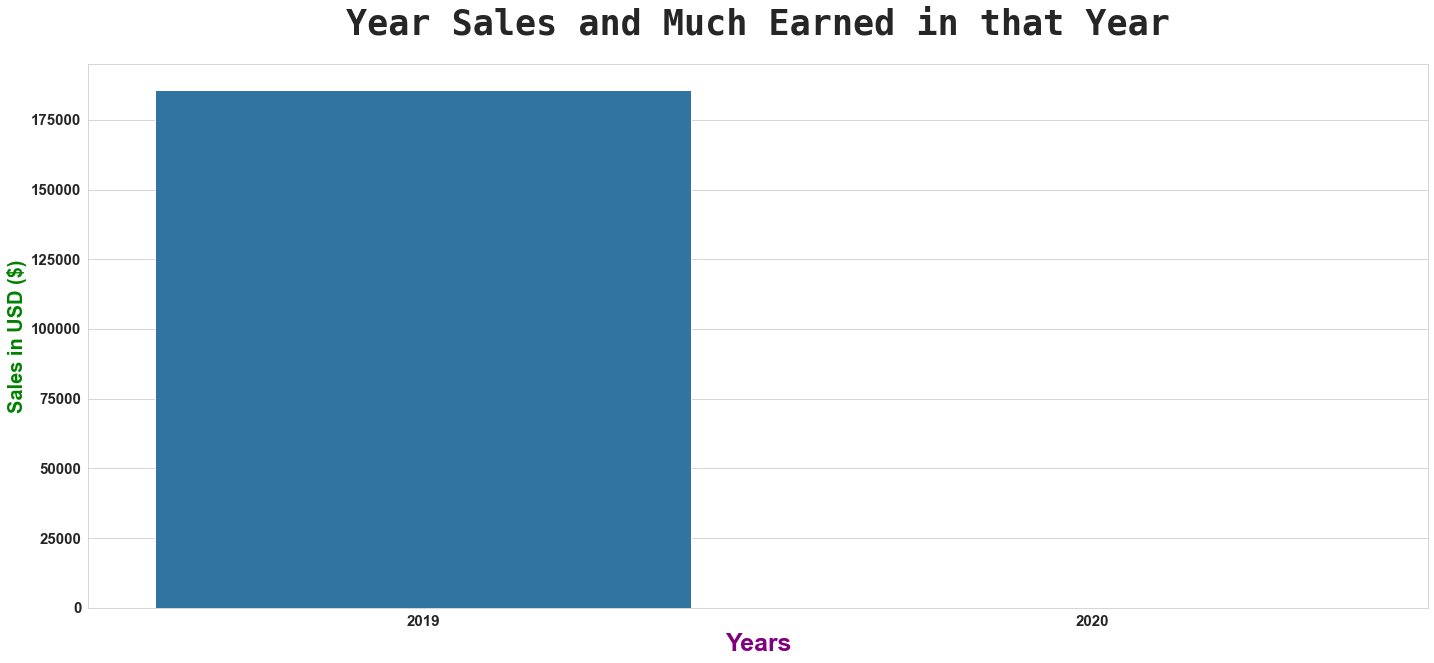

In [310]:
# let's plot it
plt.figure(figsize=(24, 10)) # figuring the size

# makes count plot 
sns.countplot(
    x="year", 
    data=clean
)
plt.title( # title
    "Year Sales and Much Earned in that Year", 
    fontname="monospace", # font-name
    weight="bold", # weiqht
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Years", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Sales in USD ($)", 
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

### What was the best month for sales? How much was earned that month?

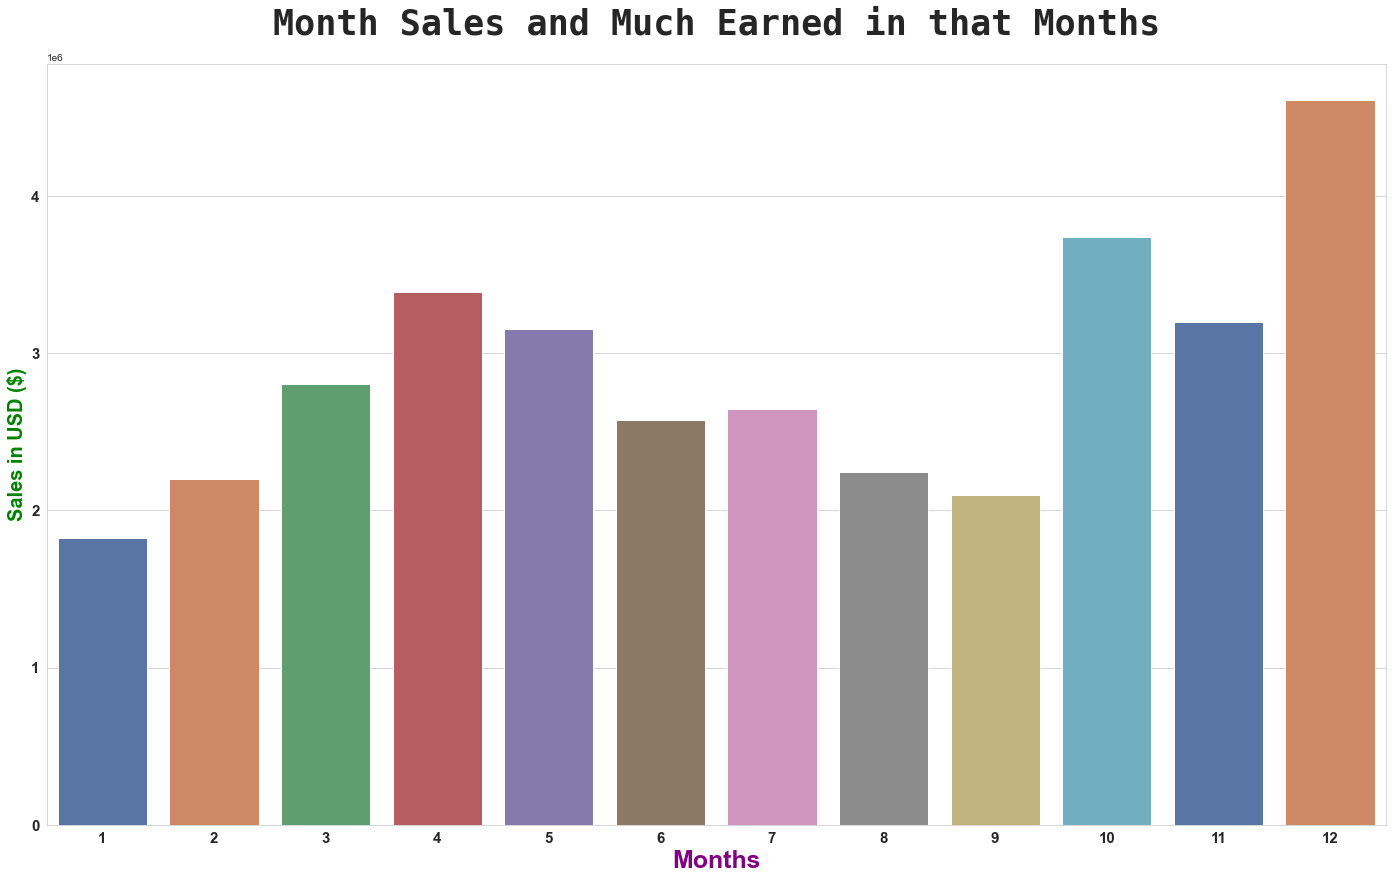

In [311]:
# group the Month cols
sum_of_month_and_earned = clean.groupby('month').sum().astype('int')

# let's plot it
plt.figure(figsize=(24, 14)) # figuring the size

# makes bar plot 
sns.barplot( # barplot
    x=sum_of_month_and_earned.index, # x-axis
    y=sum_of_month_and_earned["total sales"], # y-axis
    data=sum_of_month_and_earned, # data
    palette="deep" # palette
)
plt.title( # title
    "Month Sales and Much Earned in that Months", 
    fontname="monospace", # font-name
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Months", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Sales in USD ($)", 
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

### What City had the highest number of sales?

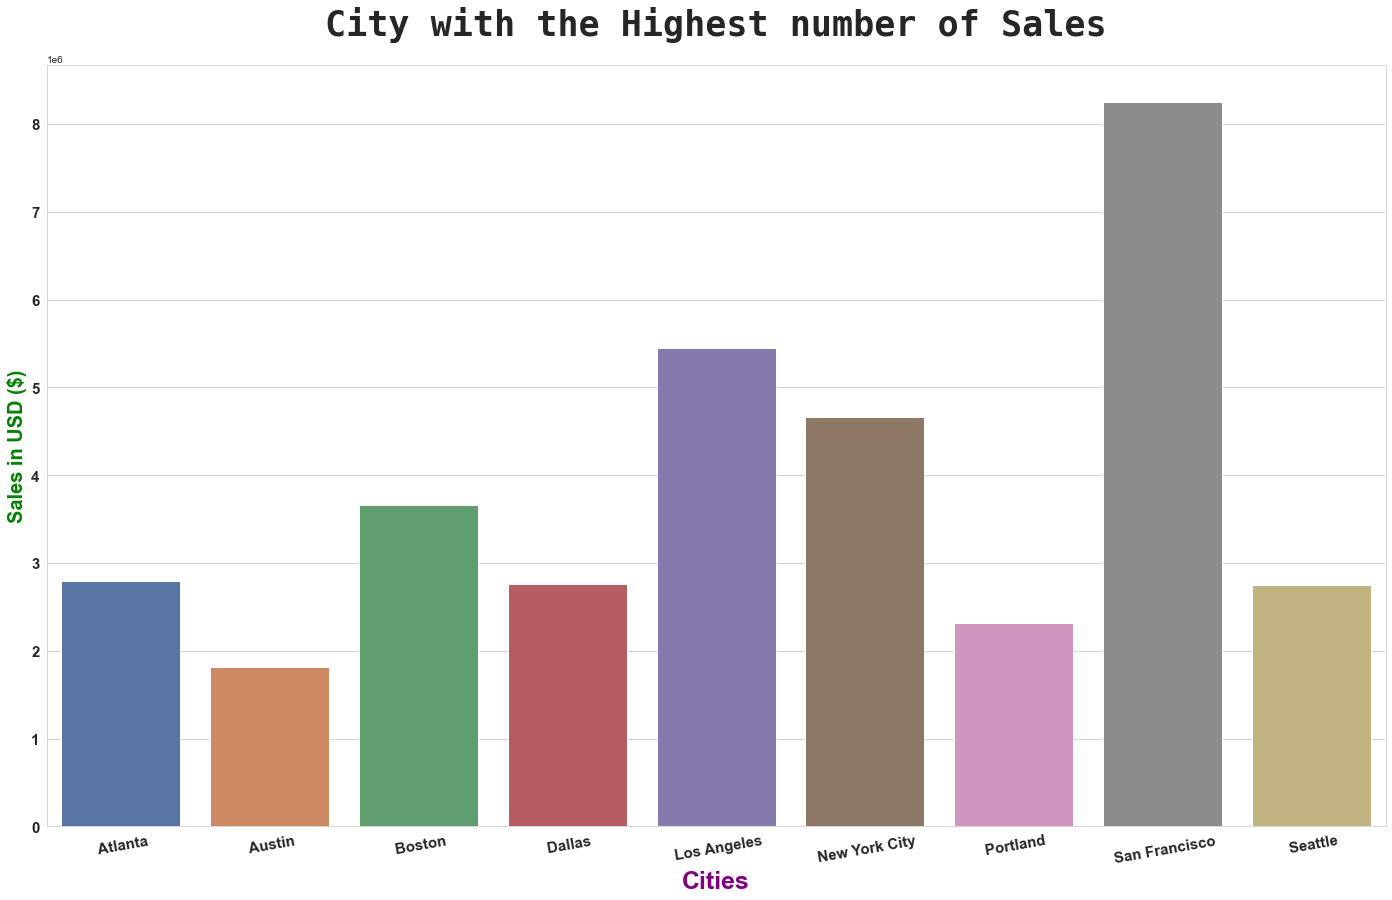

In [312]:
# group of the highest number of sales in city
highest_number_of_sales = clean.groupby('cities').sum().astype('int')

# let's plot it
plt.figure(figsize=(24, 14)) # figuring the size

# makes bar plot 
sns.barplot( # barplot
    x=highest_number_of_sales.index, # x-axis
    y=highest_number_of_sales["total sales"], # y-axis
    data=highest_number_of_sales, # data
    palette="deep" # palette
)
plt.title( # title
    "City with the Highest number of Sales", 
    fontname="monospace", # font-name
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Cities", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15, # font-size
    rotation=10
)
plt.ylabel( # y-label
    "Sales in USD ($)", 
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

### What time should we display adverstisement to maximize likelihood of customer's buying product?

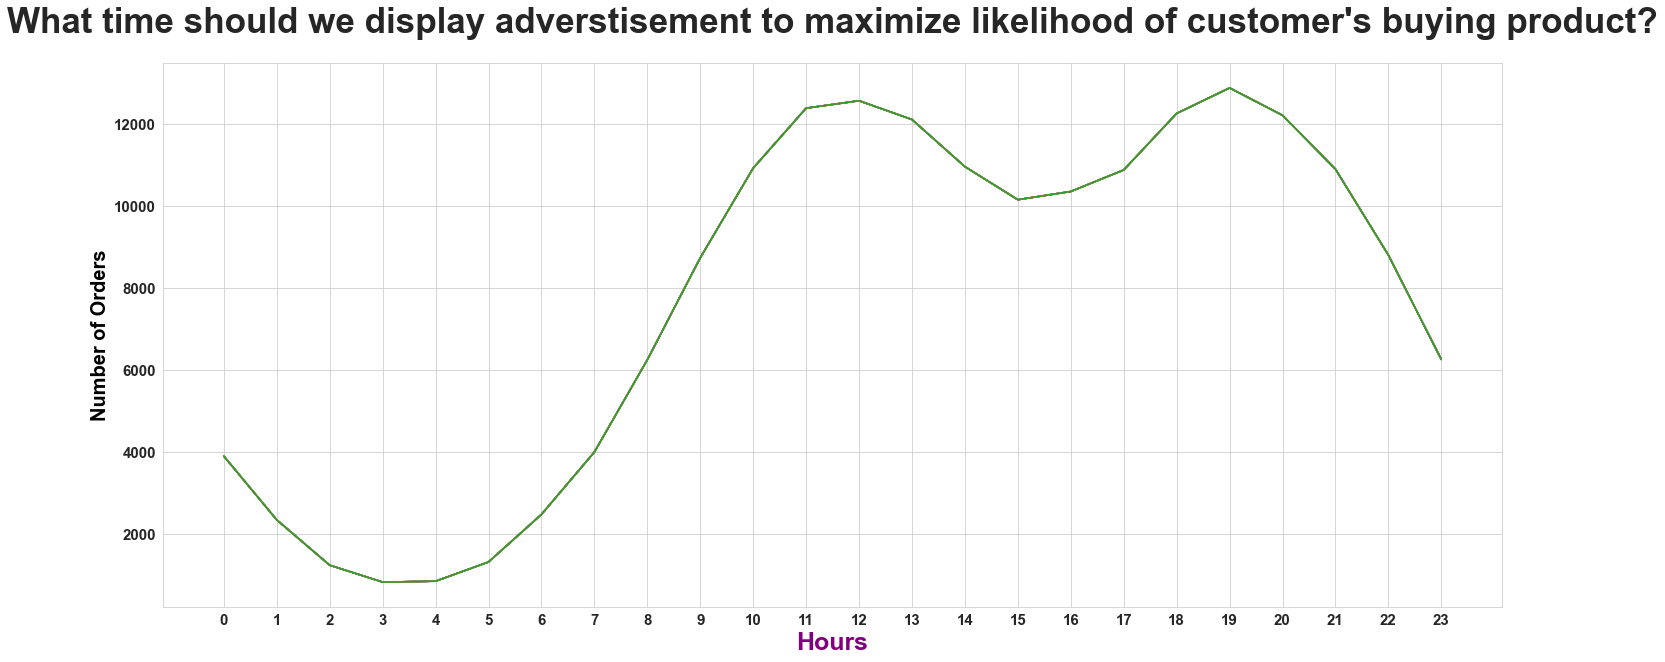

In [313]:
# let's prepare the value for the x-axis
hourly_counts = clean.groupby('hour').count()

hours = [hour1 for hour1,df in clean.groupby('hour')]

#let's plot it
plt.figure(figsize=(24, 10)) # figuring the size

# makes bar plot 
plt.plot( # plot
    hours, # x-axis
    hourly_counts['qty'],
    clean.groupby(['hour']).count() # data
)

# let's add grid
plt.grid(True)
plt.title( # title
    "What time should we display adverstisement to maximize likelihood of customer's buying product?", 
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30
)
plt.xlabel( # x-label
    "Hours", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    ticks=hours, # labels
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Number of Orders", 
    weight="bold", # weight
    color="black", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

### What product sold the most? Why do you think it sold the most?

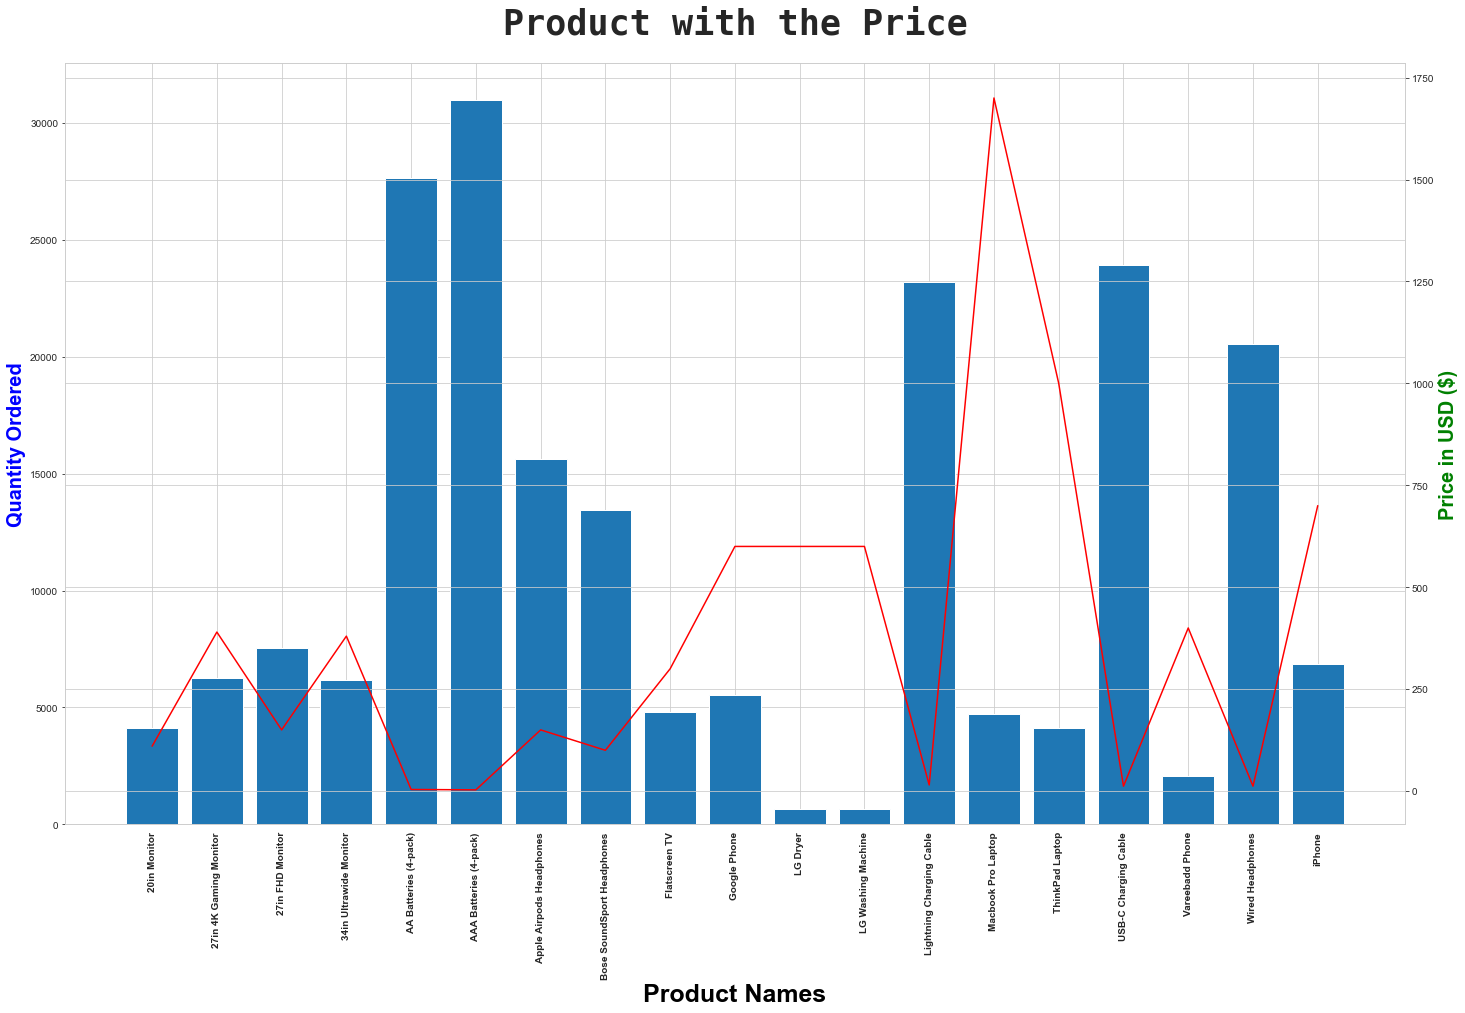

In [314]:
# lets prepare the varables for the plotting
# group the product
product_group = clean.groupby('product')
quantity_ordered = product_group.sum()['qty']
prices = clean.groupby('product').mean()['price']
products = [product for product, df in product_group]
"""Visualization"""

# let's make a subplots
fig, ax1 = plt.subplots(figsize=(24, 14))
ax2 = ax1.twinx()

# AXES 1
ax1.bar(products, quantity_ordered)
ax1.set_title( # title
    "Product with the Price",
    weight="bold", # weight
    fontname="monospace", # font-name
    fontsize=35, # font-size
    pad=30 # padding
)
ax1.set_xlabel( # x-label
    "Product Names",
    weight="bold", # weight
    fontsize=25, # font-size
    color="black" # color
)
ax1.set_ylabel( # y-label
    "Quantity Ordered", 
    color="blue", # color
    fontsize=20, # font-size
    weight="bold" # weight
)
ax1.set_xticklabels( # x-ticks
    products, # ticks
    rotation="vertical", # rotation 
    weight="bold" # weight
)

# AXES 2
ax2.plot( # plot
    products, # x-axis
    prices, # y-axis
    "r-"
)
ax2.set_ylabel( # y-label
    "Price in USD ($)", 
    color="green", # color
    fontsize=20, # font-size
    weight="bold" # weight
);

In [315]:
clean['product'].value_counts().to_frame().T

,USB-C Charging Cable,Lightning Charging Cable,AAA Batteries (4-pack),AA Batteries (4-pack),Wired Headphones,Apple Airpods Headphones,Bose SoundSport Headphones,27in FHD Monitor,iPhone,27in 4K Gaming Monitor,34in Ultrawide Monitor,Google Phone,Flatscreen TV,Macbook Pro Laptop,ThinkPad Laptop,20in Monitor,Vareebadd Phone,LG Washing Machine,LG Dryer
product,21859,21610,20612,20558,18849,15525,13298,7498,6840,6225,6174,5522,4794,4721,4126,4098,2065,666,646


### How much probability for next people will order USB-C Charging Cable?

In [316]:
def statistical_probability(frequency, total_frequency):
    return frequency / total_frequency

product = clean['product'].value_counts().sum()

In [317]:
usb_charging = clean[clean['product'] == 'USB-C Charging Cable'].value_counts().sum()

# Calculating USB-C Charging Probability
P_USB = statistical_probability(usb_charging, product)
Pprime_USB = 1 - P_USB
print('Probability for next people will order USB-C Charging Cable: %.2f%%' % P_USB)
print('Probability for next people will not order USB-C Charging Cable: %.2f%%' % Pprime_USB)

Probability for next people will order USB-C Charging Cable: 0.12%
Probability for next people will not order USB-C Charging Cable: 0.88%


### How much probability for next people will order iPhone?

In [318]:
iphone = clean[clean['product'] == 'iPhone'].value_counts().sum()

# Calculating iPhone Probability
P_iphone = statistical_probability(iphone, product)
Pprime_iphone = 1 - P_iphone
print('Probability for next people will order iPhone: %.2f%%' % P_iphone)
print('Probability for next people will not order iPhone: %.2f%%' % Pprime_iphone)

Probability for next people will order iPhone: 0.04%
Probability for next people will not order iPhone: 0.96%



### How much probability for next people will order Google Phone?

In [319]:
google_phone = clean[clean['product'] == 'Google Phone'].value_counts().sum()

# Calculating Google Phone Probability
P_google_phone = statistical_probability(google_phone, product)
Pprime_google_phone = 1 - P_google_phone
print('Probability for next people will order Google Phone: %.2f%%' % P_google_phone)
print('Probability for next people will not order Google Phone: %.2f%%' % Pprime_google_phone)

Probability for next people will order Google Phone: 0.03%
Probability for next people will not order Google Phone: 0.97%
